## Graduation-Project - End to End Machine Learning Project
<i>Welcome to <b>Palestine Car Price Prediction Machine Learning Projects.</b>! Our task is to predict a price for any car  in Palestone Country, given a number of features from our Country.</i>

<i>This notebook contains all the Steps for genrating our Machine Learning project.</i>

* for More details about Data and Cleaning process you can Visit our GitHub Repostry --> __[Graduation_project
](https://github.com/akramAssi/graduation_projects)__ 

* also you Can Fork our Mobile Application in This Repostry --> __[SOUQY
](https://github.com/akramAssi/souqy)__ 




# Setup
First, let's import all needed modules,

In [164]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.pyplot import xticks
from IPython.display import display

# Load and Understand The Data

In [10]:
excel_Path = os.path.join("/Users/macbookpro/Desktop/For Graduation/FinalData","Complete.xlsx")
MyData = pd.read_excel(excel_Path)
MyData

,make,model,type,#pass,year,price,color,fuel,history,gear,...,url,alarm,ac,radio_cd,sunroof,leatherـchair,centralـLock,magnesium_wheels,air_bag,Days_Live
0,Volkswagen,Passat,sedan,5,1999.0,28500.0,dark blue,petrol,private,automatic,...,https://shobiddak.com/cars/432099,1,1,0,1,0,1,0,0,6472
1,Volkswagen,Passat,sedan,5,2001.0,43000.0,gray,petrol,private,automatic,...,https://shobiddak.com/cars/432100,1,1,1,0,0,1,0,1,5741
2,hyundai,Accent,sedan,5,2014.0,68000.0,white,petrol,private,automatic,...,https://shobiddak.com/cars/432104,1,1,1,0,1,1,1,1,993
3,kia,Pride(rio),__sedan/hatch__,5,2008.0,49000.0,silver,diesel,private,manual,...,https://shobiddak.com/cars/432105,1,1,1,0,0,1,1,1,3185
4,BMW,3 Series,sedan,5,1986.0,30000.0,blue,petrol,private,manual,...,https://shobiddak.com/cars/432107,1,0,1,1,1,1,1,0,11219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200628,Mercedes,Vario,truck,7,1996.0,70000.0,white,diesel,Commercial,manual,...,https://shobiddak.com/cars/517019,0,1,1,0,1,1,0,0,7985
200629,Mercedes,C-Class,sedan,5,2002.0,50000.0,brown,diesel,taxi,automatic,...,https://shobiddak.com/cars/679985,0,1,1,0,1,1,1,1,7184
200630,Mercedes,Sprinter,van,7,1989.0,25000.0,white,diesel,private,manual,...,https://shobiddak.com/cars/570091,0,0,0,0,0,0,0,0,10860
200631,Mercedes,Atego,truck,3,1996.0,85000.0,white,diesel,Commercial,manual,...,https://shobiddak.com/cars/463031,1,1,1,1,0,1,0,0,7853


In [13]:
MyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200633 entries, 0 to 200632
Data columns (total 26 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   make              200633 non-null  object 
 1   model             200633 non-null  object 
 2   type              200633 non-null  object 
 3   #pass             200633 non-null  int64  
 4   year              200632 non-null  float64
 5   price             200485 non-null  float64
 6   color             200633 non-null  object 
 7   fuel              200633 non-null  object 
 8   history           200633 non-null  object 
 9   gear              200633 non-null  object 
 10  engine_size       200633 non-null  object 
 11  Kilometers        117574 non-null  float64
 12  owners            149563 non-null  float64
 13  ad_date           200633 non-null  object 
 14  payment_method    200633 non-null  object 
 15  windows           200633 non-null  object 
 16  url               20

### from the previous block we Notice that:
* The Totall Number of Data is 200633 and the Totall number of Features is 26
* The Data is contain both Categorial and numeric value
* thers Some Missing Data in Some Column (Kilometers,price,owners)
* Change wrong Dtype for some column(engine_size,owners,km) ---> `Note: This step will be delayed until we Fill the Missing Data`
  
  
  
  

* ##### `So based in This Information we will Do some Preparation on Data To be Ready`
  * Create a invidual copy from Data
  * Delete Some unncessary Column
  * Make a string in each column with one Format and delete the space by strip( ) methoud
    * `For example "BMW and bmw" must be One World`
  * Fill The Numeric Missing Data
  * Correct wrong dtype  
  
lets Start dealing with Categorial,  

In [14]:
CopyData = MyData.copy()

In [15]:
MyData.pop("ad_date")
MyData.pop("url")

0         https://shobiddak.com/cars/432099
1         https://shobiddak.com/cars/432100
2         https://shobiddak.com/cars/432104
3         https://shobiddak.com/cars/432105
4         https://shobiddak.com/cars/432107
                        ...                
200628    https://shobiddak.com/cars/517019
200629    https://shobiddak.com/cars/679985
200630    https://shobiddak.com/cars/570091
200631    https://shobiddak.com/cars/463031
200632    https://shobiddak.com/cars/481989
Name: url, Length: 200633, dtype: object

##### `1. Make Column`

In [16]:
print("Number of Uniqe Data in Make Column Before Edit: ",len(MyData.make.unique()))
MyData.make = MyData.make.str.lower()
MyData.make = MyData.make.str.strip()
MyData.make.unique()
print("Number of Uniqe Data in Make Column After Edit: ",len(MyData.make.unique()))

 The Number of Uniqe Data in Make Column before any edit is ----> 85
*** The Number of Uniqe Data in Make Column Now is ----> 66


#### `2. Model Column`

In [17]:
print("Number of Uniqe Data in Model Column Before Edit: ",len(MyData.model.unique()))
MyData.model = MyData.model.str.lower()
MyData.model = MyData.model.str.strip()
MyData.model.unique()
print("Number of Uniqe Data in Model Column After Edit: ",len(MyData.model.unique()))

 The Number of Uniqe Data in Model Column before any edit is ----> 621
*** The Number of Uniqe Data in Model Column Now is ----> 565


#### `3. Type Column`

In [19]:
print("Number of Uniqe Data in Type Column Before Edit: ",len(MyData.type.unique()))
MyData.type = MyData.type.str.lower()
MyData.type = MyData.type.str.strip()
MyData.type.unique()
print("Number of Uniqe Data in Type Column After Edit: ",len(MyData.type.unique()))

 The Number of Uniqe Data in Type Column before any edit is ----> 19
*** The Number of Uniqe Data in Type Column Now is ----> 13


#### `4. Color Column`

In [ ]:
print("Number of Uniqe Data in Color Column Before Edit: ",len(MyData.color.unique()))
MyData.color = MyData.color.str.lower()
MyData.color = MyData.color.str.strip()
MyData.color.unique()
print("Number of Uniqe Data in Color Column After Edit: ",len(MyData.color.unique()))

#### `5. History Column`


In [20]:
print("Number of Uniqe Data in History Column Before Edit: ",len(MyData.history.unique()))
MyData.history = MyData.history.str.lower()
MyData.history = MyData.history.str.strip()
MyData.history.unique()
print("Number of Uniqe Data in History Column After Edit: ",len(MyData.history.unique()))

Number of Uniqe Data in History Column Before Edit:  7
Number of Uniqe Data in History Column Before Edit:  6


#### `6. Gear-Type Column`


In [1]:
print("Number of Uniqe Data in Gear-Type Column Before Edit: ",len(MyData.gear.unique()))
MyData.gear = MyData.gear.str.lower()
MyData.gear = MyData.gear.str.strip()
MyData.gear.unique()
print("Number of Uniqe Data in Gear-Type Column After Edit: ",len(MyData.gear.unique()))

NameError: name 'MyData' is not defined

#### `7. Payment-Method Column`

In [22]:
print("Number of Uniqe Data in Payment-Method Column Before Edit: ",len(MyData.payment_method.unique()))
MyData.payment_method = MyData.payment_method.str.lower()
MyData.payment_method = MyData.payment_method.str.strip()
MyData.payment_method.unique()
print("Number of Uniqe Data in Payment-Method Column Before Edit: ",len(MyData.payment_method.unique()))

Number of Uniqe Data in Payment-Method Column Before Edit:  3
Number of Uniqe Data in Payment-Method Column Before Edit:  2


#### `8. Fuel-Type Column`

In [255]:
print("Number of Uniqe Data in fuel-Type Column Before Edit: ",len(MyData.fuel.unique()))
MyData.fuel = MyData.fuel.str.lower()
MyData.fuel = MyData.fuel.str.strip()
MyData.fuel.unique()
print("Number of Uniqe Data in fuel-Type Column After Edit: ",len(MyData.fuel.unique()))

Number of Uniqe Data in fuel-Type Column Before Edit:  3
Number of Uniqe Data in fuel-Type Column After Edit:  3


#### `8. Window Column`

In [254]:
print("Number of Uniqe Data in windows Column Before Edit: ",len(MyData.windows.unique()))
MyData.windows = MyData.windows.str.lower()
MyData.windows = MyData.windows.str.strip()
MyData.windows.unique()
print("Number of Uniqe Data in windows Column After Edit: ",len(MyData.windows.unique()))

Number of Uniqe Data in windows Column Before Edit:  2
Number of Uniqe Data in windows Column After Edit:  2


### Now we must deal with the numeric Missing Data
Thers a lot of different Techniqe that can we used to fill the Missing data:
* Median imputation
* Mean imputation
* Mode imputation
* MissForest imputation

<b> Note: Documantion contain the Comparesion between all imputations </b>

###### ` So after applay all previous Techniqe , we Notice That MissForest will give the best imputation and less MAE`
lets start applauing this Methoud:
* Firstly, we Must imported the needed library.
* Then we Must split the Target value from the Data.
* Finally we perform the imputation in all Data then use this imputation to fill Missing Data.

In [27]:
# MyData.isna().sum()
fill the data
convert to the coreect dtype

# Visualizing the data

##### `Now Data was ready, we can do a graphical representation on it to see its behaviour`
* Visulaizing is common for 2 different way:
   * Visualising Categorical Data
   * Visualising Numaric Data
   
lets start visulaize The Categorical Data:
 * Make
 * Model
 * type
 * Color
 * Fuel
 * History
 * Gear
 * payment_method
 * windows
 
##### `Define a List Containe Color for plotes to be changed as you wnat`  

In [185]:
MyColor = ['dodgerblue', 'darkorange', 'forestgreen', 'crimson'
           ,'orchid','saddlebrown','pink','gray','y','c','powderblue']

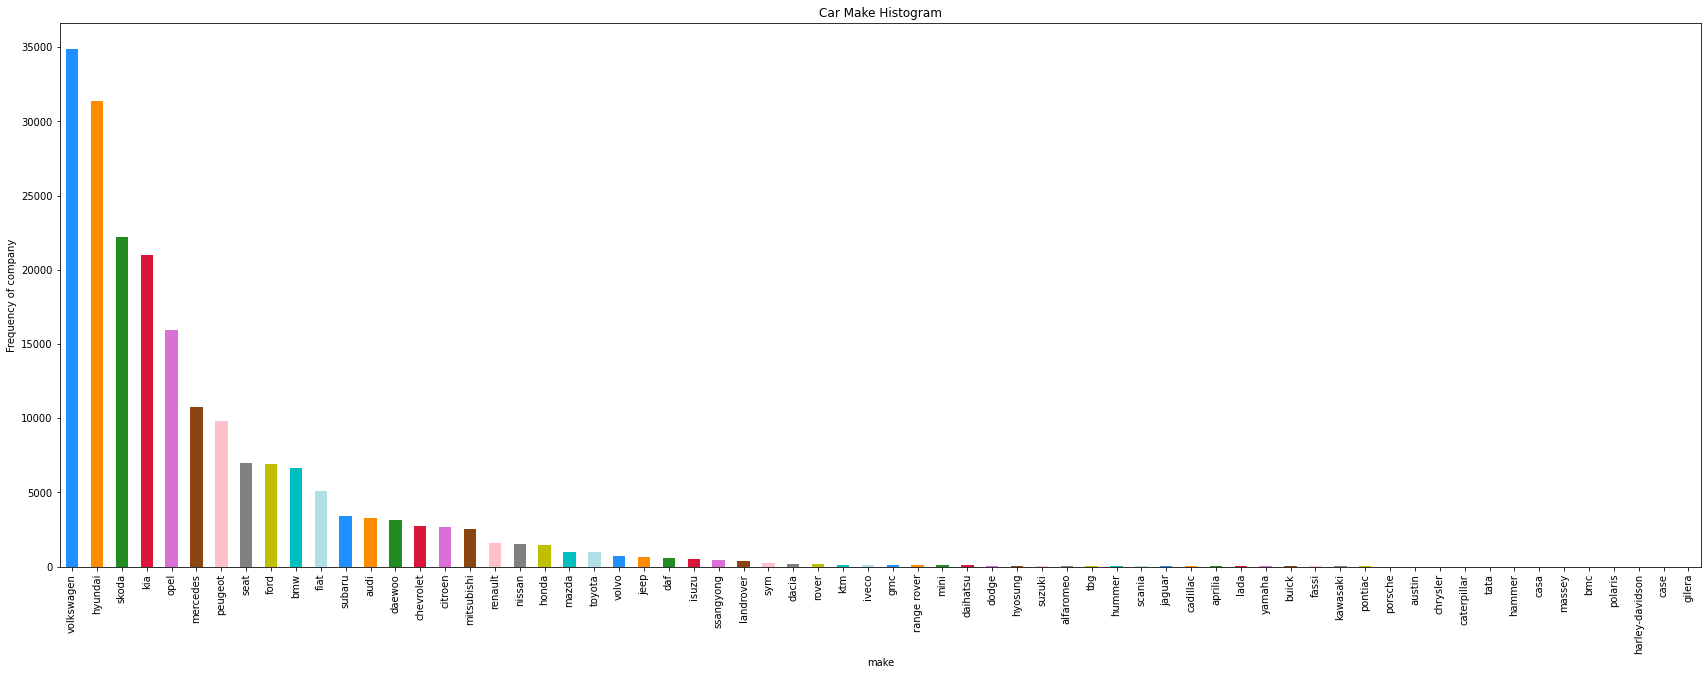

In [108]:
plt.figure(figsize=(100,10))

plt.subplot(1,3,1)
plt1 = MyData.make.value_counts().plot(kind='bar',color=MyColor)
plt.title('Car Make Histogram')
plt1.set(xlabel = 'make', ylabel='Frequency of company')

plt.show()

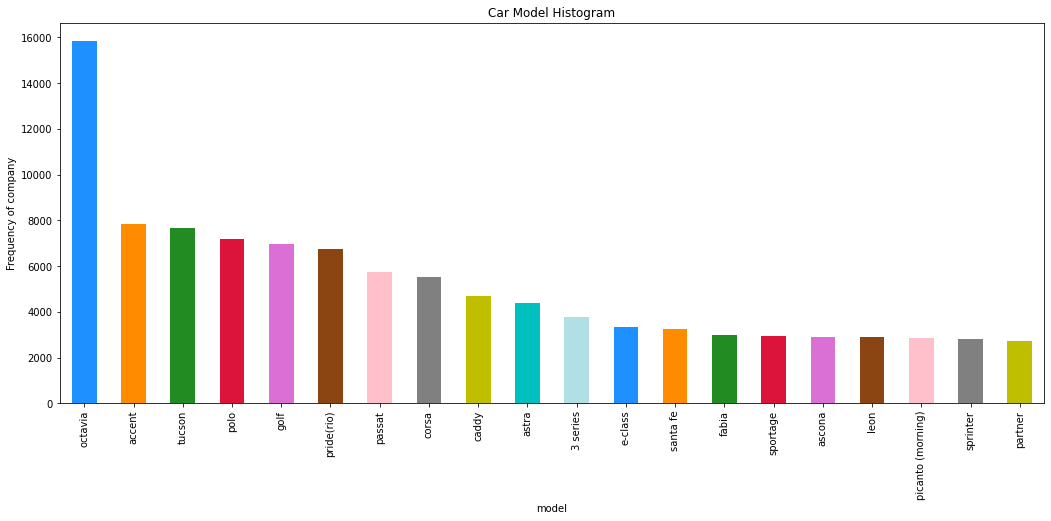

In [133]:
    plt.figure(figsize=(60,7))

plt.subplot(1,3,1)
plt1 = MyData.model.value_counts().nlargest(n=20, keep='first').plot(kind='bar',color=MyColor)
plt.title('Car Model Histogram')
plt1.set(xlabel = 'model', ylabel='Frequency of company')


plt.show()


[Text(0.5, 0, 'Type'), Text(0, 0.5, 'Frequency of Car Type')]

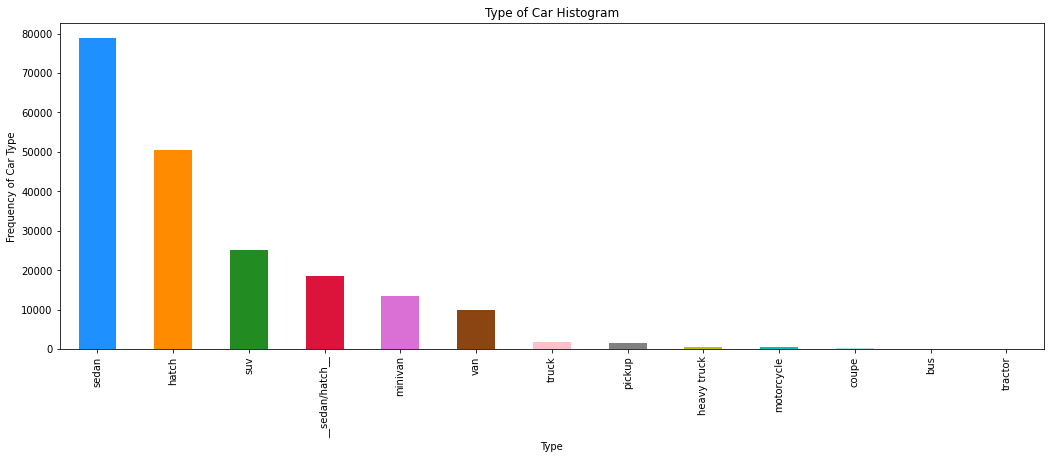

In [137]:
plt.figure(figsize=(60,6))
plt.subplot(1,3,1)
plt1 = MyData.type.value_counts().plot(kind='bar',color=MyColor)
plt.title('Type of Car Histogram')
plt1.set(xlabel = 'Type', ylabel='Frequency of Car Type')

[Text(0.5, 0, 'windows'), Text(0, 0.5, 'Frequency of gear')]

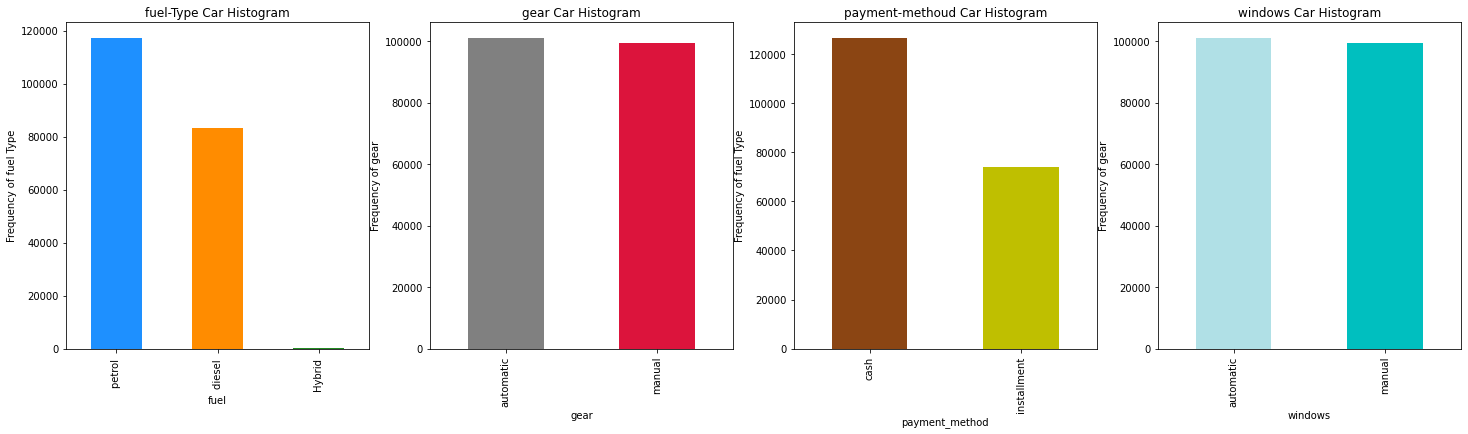

In [162]:
plt.figure(figsize=(25, 6))

plt.subplot(1,4,1)
plt1 = MyData.fuel.value_counts().plot(kind='bar',color = MyColor)
plt.title('fuel-Type Car Histogram')
plt1.set(xlabel = 'fuel', ylabel='Frequency of fuel Type')


plt.subplot(1,4,2)
plt1 = MyData.gear.value_counts().plot(kind='bar',color = ['gray','crimson'])
plt.title('gear Car Histogram')
plt1.set(xlabel = 'gear', ylabel='Frequency of gear')


plt.subplot(1,4,3)
plt1 = MyData.payment_method.value_counts().plot(kind='bar',color = ['saddlebrown','y'])
plt.title('payment-methoud Car Histogram')
plt1.set(xlabel = 'payment_method', ylabel='Frequency of fuel Type')


plt.subplot(1,4,4)
plt1 = MyData.gear.value_counts().plot(kind='bar',color = ['powderblue','c'])
plt.title('windows Car Histogram')
plt1.set(xlabel = 'windows', ylabel='Frequency of gear')



[Text(0.5, 0, 'Color'), Text(0, 0.5, 'Frequency of Color')]

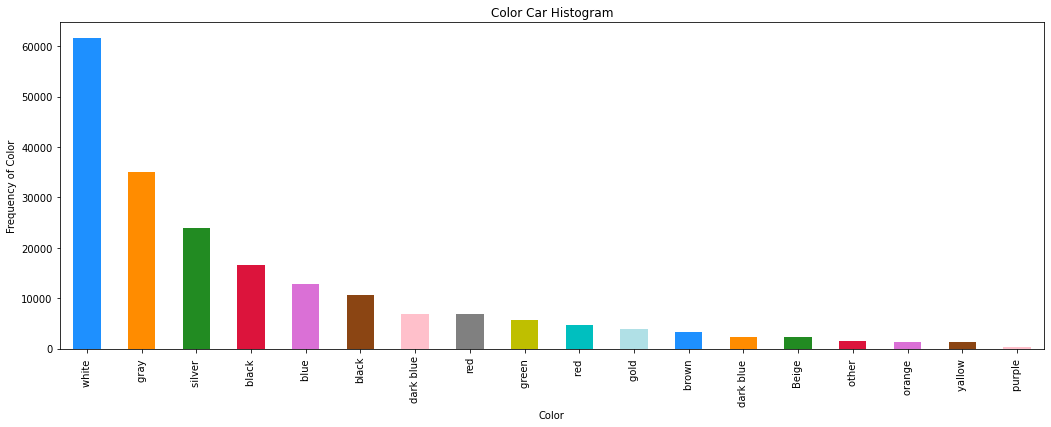

In [155]:
plt.figure(figsize=(60,6))

plt.subplot(1,3,1)
plt1 = MyData.color.value_counts().plot(kind='bar',color = MyColor)
plt.title('Color Car Histogram')
plt1.set(xlabel = 'Color', ylabel='Frequency of Color')

### Now The visulaizeing must applay in The Numeric Data:
lets Start:
* Target Column (price)
* year Car produce
* previous owners for the Car
* number of passenger in the car
* engine size
* Kilometers that car run


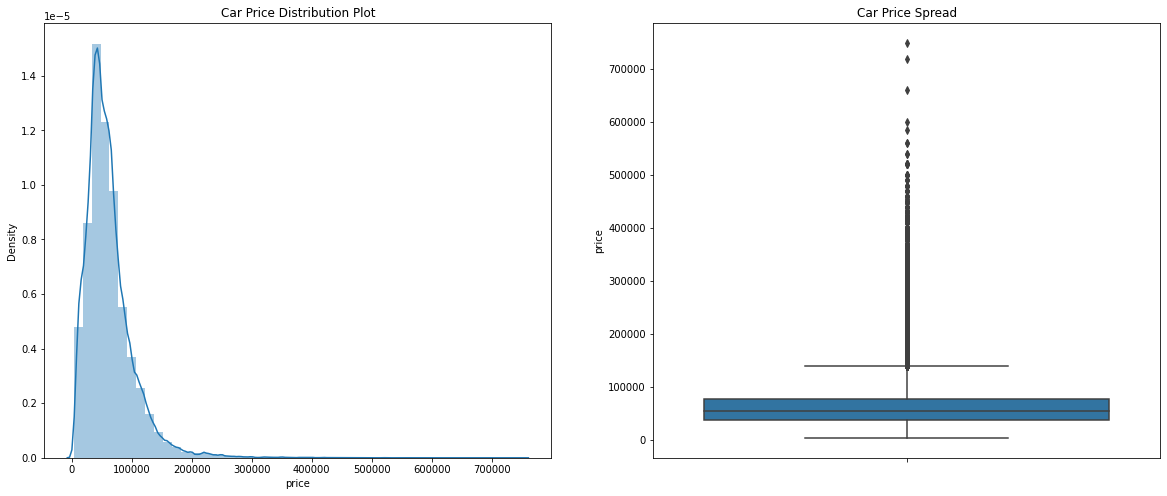

In [165]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(MyData.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=MyData.price)

plt.show()

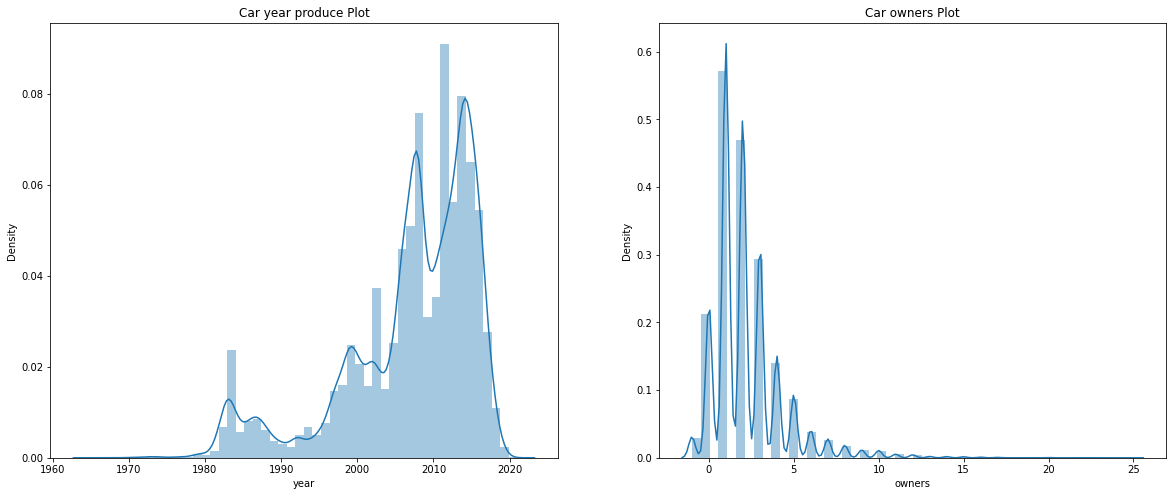

In [193]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car year produce Plot')
sns.distplot(MyData.year)


plt.subplot(1,2,2)
plt.title('Car owners Plot')
sns.distplot(MyData.owners)

plt.show()

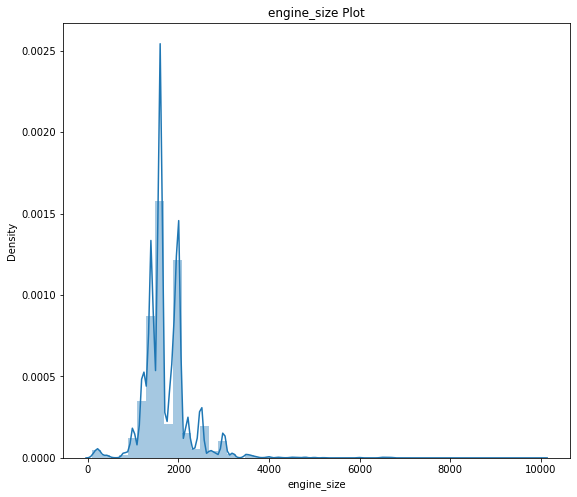

In [194]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('passenger Plot')
sns.distplot(MyData.#pass)


plt.subplot(1,2,2)
plt.title('engine_size Plot')
sns.distplot(MyData.engine_size)

plt.show()

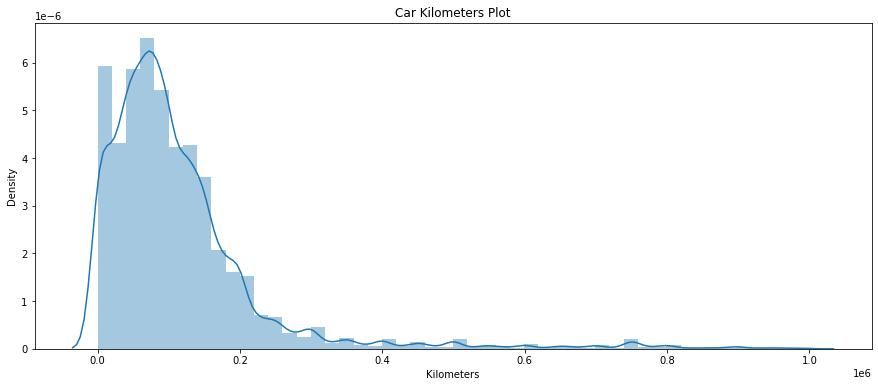

In [207]:
plt.figure(figsize=(15, 6))

plt.title('Car Kilometers Plot')
sns.distplot(MyData.Kilometers)

plt.show()


##### `Inference from previous plots`

* The price plot seemed That the most prices in Data are low(between <b>(20,000 and 100,000)</b>) with some car above and below

* The year plot seemed That the most car in Data are low(between <b>(2005 and 2017)</b>) with some car above and below

* The owners plot seemed That the most previous owners for the car in Data is about <b> 2 </b>

* The passenger plot seemed That the most capacity passenger for the car in Data is about <b> 5 </b>

* The engine_size plot seemed That the most engine_size for the car in Data are low(between <b>(1000 and 1700)</b>)

#### `important Note and explantion`
* in Kilometers plot:
  * the y-axis is standard scientific notion, so if there's a 0.2 on the y-axis and a 1e6 at the top, the value for 0.2 actually indicates 0.2*1e6 = 0.2 * 10^6 = 200,000.
  
  * from the previous Note , The Kilometers plot seemed That the most car in Data are run about <b> 100,000 Km </b>



# Do Some Statistics on Data to gain insights before Use it

المقارانات 
الكولريشن
الكم فوق ال٥٠٠
الشباك

In [215]:
Corr_matrix = MyData.corr()
Corr_matrix["price"].sort_values(ascending = False)

price               1.000000
year                0.555740
sunroof             0.360850
air_bag             0.310449
engine_size         0.308558
ac                  0.303398
centralـLock        0.269278
leatherـchair       0.256834
alarm               0.254308
magnesium_wheels    0.211678
radio_cd            0.146318
#pass               0.135014
Kilometers         -0.137541
owners             -0.404691
Days_Live          -0.562072
Name: price, dtype: float64

In [238]:
MyData["Features"] = MyData["magnesium_wheels"] / MyData["radio_cd"]

In [239]:
Corr_matrix = MyData.corr()
Corr_matrix["price"].sort_values(ascending = False)

price               1.000000
year                0.555740
sunroof             0.360850
air_bag             0.310449
engine_size         0.308558
ac                  0.303398
centralـLock        0.269278
leatherـchair       0.256834
alarm               0.254308
magnesium_wheels    0.211678
Features            0.185247
radio_cd            0.146318
#pass               0.135014
Kilometers         -0.137541
owners             -0.404691
Days_Live          -0.562072
Name: price, dtype: float64

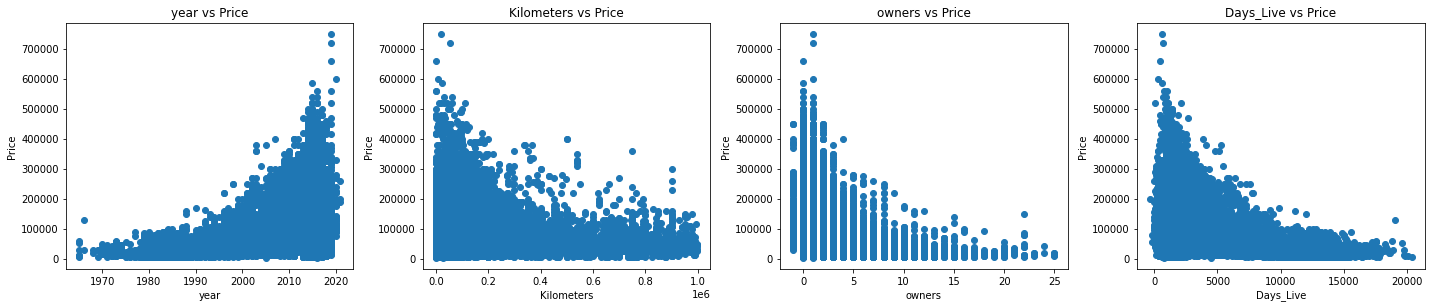

In [227]:
def scatter(x,fig):
    plt.subplot(5,4,fig)
    plt.scatter(MyData[x],MyData['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)
    
    
plt.figure(figsize=(20,20))

scatter('year', 1)
scatter('Kilometers', 2)
scatter('owners', 3)
scatter('Days_Live', 4)



plt.tight_layout()    

In [233]:
# # from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
# from pandas.plotting import scatter_matrix

# attributes = ["price","year","engine_size","#pass","Kilometers","owners","Days_Live"]
# scatter_matrix(MyData[attributes], figsize=(12, 8))
# plt.show()

<AxesSubplot:>

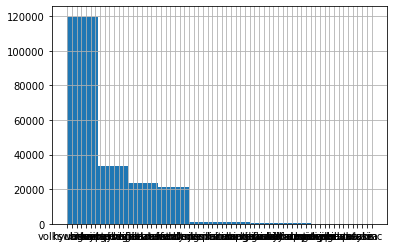

In [260]:
MyData["make"].hist()